In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/historique.csv',sep=';')

In [ ]:
df1=pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')

In [ ]:
df1.drop(['Unnamed: 0','Id_User','Year_dep','Month_dep','traffic','securite','comfort'],axis=1,inplace=True)

In [ ]:
df1['id_trajet']=pd.Series(range(1,1177540))

In [ ]:
data= pd.merge(df, df1, on='id_trajet', how='inner') 

In [ ]:
data

,id_user,id_trajet,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,day_dep,weekday_name_dep,Hour_dep,minute_dep,day_arr,weekday_name_arr,Hour_arr,minute_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,route,accident,rating
0,1,171134,BERRECHID,33.267675,-7.581147,TEMARA,33.917166,-6.923804,112.519000,33.75570,25,Friday,8,46,25,Friday,12,12,3,26,22,autocar,national,0,3
1,2,171134,BERRECHID,33.267675,-7.581147,TEMARA,33.917166,-6.923804,112.519000,33.75570,25,Friday,8,46,25,Friday,12,12,3,26,22,autocar,national,0,3
2,3,171134,BERRECHID,33.267675,-7.581147,TEMARA,33.917166,-6.923804,112.519000,33.75570,25,Friday,8,46,25,Friday,12,12,3,26,22,autocar,national,0,3
3,4,171134,BERRECHID,33.267675,-7.581147,TEMARA,33.917166,-6.923804,112.519000,33.75570,25,Friday,8,46,25,Friday,12,12,3,26,22,autocar,national,0,3
4,5,171134,BERRECHID,33.267675,-7.581147,TEMARA,33.917166,-6.923804,112.519000,33.75570,25,Friday,8,46,25,Friday,12,12,3,26,22,autocar,national,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2199995,2196,969902,ERRACHIDIA,31.929089,-4.434081,KENITRA,34.264570,-6.570169,550.160999,247.57245,16,Friday,19,4,17,Saturday,8,36,13,32,17,CTM,autoroute,0,3
2199996,2197,969902,ERRACHIDIA,31.929089,-4.434081,KENITRA,34.264570,-6.570169,550.160999,247.57245,16,Friday,19,4,17,Saturday,8,36,13,32,17,CTM,autoroute,0,3
2199997,2198,969902,ERRACHIDIA,31.929089,-4.434081,KENITRA,34.264570,-6.570169,550.160999,247.57245,16,Friday,19,4,17,Saturday,8,36,13,32,17,CTM,autoroute,0,3
2199998,2199,969902,ERRACHIDIA,31.929089,-4.434081,KENITRA,34.264570,-6.570169,550.160999,247.57245,16,Friday,19,4,17,Saturday,8,36,13,32,17,CTM,autoroute,0,3


In [ ]:
#extract the categorial featuers
obj_df = data.select_dtypes(include=['object']).copy()
obj_df.head()

,Ville de depart,Ville d'arrivée,weekday_name_dep,weekday_name_arr,Moyen_de_transport,route
0,BERRECHID,TEMARA,Friday,Friday,autocar,national
1,BERRECHID,TEMARA,Friday,Friday,autocar,national
2,BERRECHID,TEMARA,Friday,Friday,autocar,national
3,BERRECHID,TEMARA,Friday,Friday,autocar,national
4,BERRECHID,TEMARA,Friday,Friday,autocar,national


In [ ]:
daata=pd.get_dummies(data, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])

In [ ]:
data1=daata[['id_user','id_trajet','Latitude','Longitude','Latitude.1','Longitude.1','Distance','prix','day_dep','Hour_dep','minute_dep','day_arr','Hour_arr','minute_arr','hour_duree','minute_duree','nombre_place','week_dep_Friday','week_dep_Monday','week_dep_Saturday','week_dep_Sunday','week_dep_Thursday','week_dep_Tuesday','week_dep_Wednesday','week_arr_Friday','week_arr_Monday','week_arr_Saturday','week_arr_Sunday','week_arr_Thursday','week_arr_Tuesday','week_arr_Wednesday','transport_CTM','transport_Voiture','transport_autocar','route_autoroute','route_national','rating']]

In [ ]:
data2=data1.sample(frac=1)

In [ ]:
import keras
import keras.utils
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import keras
import keras.utils
from sklearn import preprocessing
from keras.layers import Activation
from keras.layers import Dropout 
from keras import regularizers
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

Using TensorFlow backend.


In [ ]:
X = data2.iloc[:,0:36].values

print('The independent features set: ')
print(X[:,0:36])

The independent features set: 
[[7.97000000e+02 7.74046000e+05 3.40346534e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.42000000e+02 8.35867000e+05 3.42645700e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.32000000e+02 1.31002000e+05 3.35950627e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 ...
 [3.00000000e+02 1.36713000e+05 3.40224050e+01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]
 [1.30200000e+03 9.45932000e+05 3.40346534e+01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.49000000e+02 1.84206000e+05 3.28855080e+01 ... 1.00000000e+00
  1.00000000e+00 0.00000000e+00]]


In [ ]:
X = data2.iloc[:,0:36].values

print('The independent features set: ')

y = data2.iloc[:,36].values

The independent features set: 


In [ ]:
y

array([1, 1, 3, ..., 3, 1, 4])

In [ ]:
import keras
import keras.utils
y=keras.utils.to_categorical(y, num_classes=None, dtype='float32')
y

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn import preprocessing
import numpy as np
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X.shape)
np.save('/content/drive/My Drive/scaler.npy',min_max_scaler)

(2200000, 36)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3)

In [ ]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1540000, 36) (330000, 36) (330000, 36) (1540000, 5) (330000, 5) (330000, 5)


In [ ]:
# K fold validation
def build_classifier():
  model = Sequential()
#First Hidden Layer
  model.add(layers.Dense(18,input_dim=36,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(Activation("relu"))
  Dropout(0.3)
#Second  Hidden Layer
  model.add(layers.Dense(18, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
  model.add(layers.BatchNormalization())
  model.add(Activation("relu"))
  Dropout(0.3)
#Output Layer
  model.add(Dense(5,activation='sigmoid',kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
  model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])
  
  return model

In [ ]:
model= KerasClassifier(build_fn=build_classifier, batch_size=32, nb_epoch=5)

In [ ]:
model.fit(X_train, Y_train)

Epoch 1/1
1540000/1540000 [==============================] - 74s 48us/step - loss: 0.5042 - accuracy: 0.8518


In [ ]:
scores = cross_val_score(model,X_train, Y_train, cv=5)

Epoch 1/1
308000/308000 [==============================] - 7s 22us/step
Epoch 1/1
308000/308000 [==============================] - 7s 23us/step
Epoch 1/1
308000/308000 [==============================] - 7s 22us/step
Epoch 1/1
308000/308000 [==============================] - 7s 23us/step
Epoch 1/1
308000/308000 [==============================] - 7s 23us/step


In [ ]:
model.evaluate(X_test, Y_test)[1]

In [ ]:
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=5,          validation_data=(X_val, Y_val)) 

Train on 1540000 samples, validate on 330000 samples
Epoch 1/5
1540000/1540000 [==============================] - 80s 52us/step - loss: 0.5121 - accuracy: 0.8498 - val_loss: 0.3667 - val_accuracy: 0.9155
Epoch 2/5
1540000/1540000 [==============================] - 78s 51us/step - loss: 0.4182 - accuracy: 0.8819 - val_loss: 0.3271 - val_accuracy: 0.9262
Epoch 3/5
1540000/1540000 [==============================] - 80s 52us/step - loss: 0.3941 - accuracy: 0.8898 - val_loss: 0.3039 - val_accuracy: 0.9385
Epoch 4/5
1540000/1540000 [==============================] - 80s 52us/step - loss: 0.3815 - accuracy: 0.8935 - val_loss: 0.2995 - val_accuracy: 0.9228
Epoch 5/5
1540000/1540000 [==============================] - 80s 52us/step - loss: 0.3712 - accuracy: 0.8971 - val_loss: 0.2831 - val_accuracy: 0.9376


In [ ]:
model = Sequential()
#First Hidden Layer
model.add(layers.Dense(18,input_dim=36,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Second  Hidden Layer
model.add(layers.Dense(18, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Output Layer
model.add(Dense(5,activation='sigmoid',kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='sgd',              loss='categorical_crossentropy',              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=9,          validation_data=(X_val, Y_val)) 

Train on 1540000 samples, validate on 330000 samples
Epoch 1/9
1540000/1540000 [==============================] - 81s 52us/step - loss: 0.5156 - accuracy: 0.8411 - val_loss: 0.3929 - val_accuracy: 0.8891
Epoch 2/9
1540000/1540000 [==============================] - 80s 52us/step - loss: 0.4202 - accuracy: 0.8793 - val_loss: 0.3300 - val_accuracy: 0.9319
Epoch 3/9
1540000/1540000 [==============================] - 82s 53us/step - loss: 0.3953 - accuracy: 0.8898 - val_loss: 0.3339 - val_accuracy: 0.9224
Epoch 4/9
1540000/1540000 [==============================] - 81s 53us/step - loss: 0.3818 - accuracy: 0.8945 - val_loss: 0.3025 - val_accuracy: 0.9236
Epoch 5/9
1540000/1540000 [==============================] - 81s 53us/step - loss: 0.3732 - accuracy: 0.8972 - val_loss: 0.2914 - val_accuracy: 0.9350
Epoch 6/9
1540000/1540000 [==============================] - 82s 53us/step - loss: 0.3686 - accuracy: 0.8986 - val_loss: 0.2988 - val_accuracy: 0.9285
Epoch 7/9
1540000/1540000 [==============

In [ ]:
model = Sequential()
#First Hidden Layer
model.add(layers.Dense(18,input_dim=36,kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Second  Hidden Layer
model.add(layers.Dense(18, kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.BatchNormalization())
model.add(Activation("relu"))
Dropout(0.3)
#Output Layer
model.add(Dense(5,activation='sigmoid',kernel_initializer='normal',kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer='adam',              loss='categorical_crossentropy',              metrics=['accuracy'])
hist = model.fit(X_train, Y_train,          batch_size=32, epochs=9,          validation_data=(X_val, Y_val)) 

Train on 1540000 samples, validate on 330000 samples
Epoch 1/9
1540000/1540000 [==============================] - 92s 60us/step - loss: 0.3603 - accuracy: 0.8931 - val_loss: 0.2031 - val_accuracy: 0.9614
Epoch 2/9
1540000/1540000 [==============================] - 100s 65us/step - loss: 0.2793 - accuracy: 0.9233 - val_loss: 0.2067 - val_accuracy: 0.9515
Epoch 3/9
1540000/1540000 [==============================] - 91s 59us/step - loss: 0.2621 - accuracy: 0.9294 - val_loss: 0.1803 - val_accuracy: 0.9722
Epoch 4/9
1540000/1540000 [==============================] - 89s 58us/step - loss: 0.2537 - accuracy: 0.9325 - val_loss: 0.1728 - val_accuracy: 0.9697
Epoch 5/9
1540000/1540000 [==============================] - 93s 61us/step - loss: 0.2490 - accuracy: 0.9339 - val_loss: 0.1587 - val_accuracy: 0.9682
Epoch 6/9
1540000/1540000 [==============================] - 92s 60us/step - loss: 0.2457 - accuracy: 0.9349 - val_loss: 0.1567 - val_accuracy: 0.9756
Epoch 7/9
1540000/1540000 [=============

In [ ]:
# serialize classifier to JSON
classifier_json = model.to_json()
with open("/content/drive/My Drive/model.json", "w") as json_file:
    json_file.write(classifier_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/model.h5")
print("Saved classifier to disk")

Saved classifier to disk


In [ ]:
def loadModel():
	json_file = open('/content/drive/My Drive/model.json', 'r')
	loaded_model_json = json_file.read()
	json_file.close()
	loaded_model = model_from_json(loaded_model_json)
	# load weights into new model
	loaded_model.load_weights("/content/drive/My Drive/model.h5")
	print("Loaded model from disk")
	return loaded_model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
ypred=np.argmax(y_pred, axis=1)


In [ ]:
Ytest=np.argmax(Y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix 
cf_matrix = confusion_matrix (Ytest, ypred) 
print (cf_matrix)

[[67024  2130     0     0     0]
 [ 5618 73462  2045     0     0]
 [  637  2725 63960  1899     0]
 [    0     0  1363 61202  2933]
 [    0     0     0     0 45002]]


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


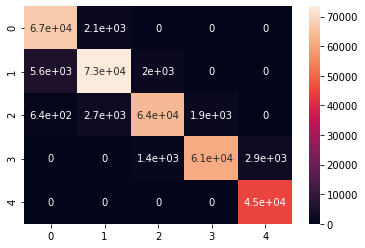

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

0 4


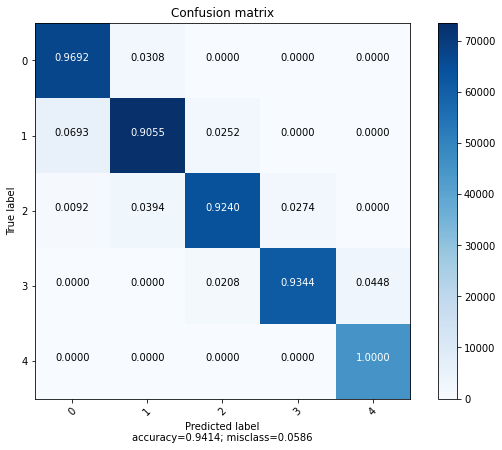

In [ ]:
import itertools 
import numpy as np
from sklearn.metrics import confusion_matrix 
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
Y_test=np.argmax(Y_test, axis=1) # also need an argmax 
print(y_pred.min(),y_pred.max())
cm = confusion_matrix(Y_test, y_pred)
plot_confusion_matrix(cm,range(Y_test.min(),Y_test.max()+1),normalize=True)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, y_pred)

0.06442727272727272

In [ ]:
def dayOfWeek(d):
    year, month, day = (x for x in d.split('/'))
    if len(day) == 4: #'YYYY/MM/DD or DD/MM/YYYY'
        tmp = day
        day = year
        year= tmp
    day, month, year = int(day), int(month), int(year)
    dow = date(year, month, day).weekday() # return just a number from 0 to  6
    days = ['Sunday','Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
    return days[dow] , day,month,year

In [ ]:
from datetime import date
from keras.models import model_from_json

In [ ]:
def testModelMono(ville_depart,ville_arrive,date_depart):
  """
  params :
  ville_depart : string
  ville_arrive : string
  date_depart : string
  day_depart  : int64

  Month_depart  : int64
  return :
  rating of trips that includes tha paramters in the database (we pretend that we have a database,actually its the same data we traing with)
  """
  data = pd.read_csv('/content/drive/My Drive/datasetratingfinal.csv')
  resultat = data.copy()
  data =pd.get_dummies(data, columns=["weekday_name_dep","weekday_name_arr","Moyen_de_transport",'route'], prefix=["week_dep","week_arr","transport",'route'])
  weekday_name_dep, day_dep,Month_dep,Year_dep = dayOfWeek(date_depart) # pour retourner la date sous la forme qu'on a dans notre dataset
  idx = (data['Ville de depart'] == ville_depart) & (data["Ville d'arrivée"] == ville_arrive) & (data['day_dep'] == day_dep) & (data['Month_dep'] == Month_dep) & (data['Year_dep'] ==Year_dep)# you van add the mounths and the year 
  request = data [idx] 
  resultat = resultat[idx]
  resultat.drop(['Unnamed: 0','Id_User','traffic','securite','accident','comfort','rating'],axis=1,inplace=True)
  request.drop(['Unnamed: 0','Id_User','Ville de depart',"Ville d'arrivée",'traffic','securite','accident','comfort','rating'],axis=1,inplace=True)
  
  # get the serialize model and scaller 
  model = loadModel()
  scaler = np.load('/content/drive/My Drive/scaler.npy',allow_pickle=True).item() 
 
  X_test = request.to_numpy()
  print(X_test.shape)
  X_test = scaler.transform(X_test)

  Y_pred = model.predict(X_test)
  print(Y_pred.shape)
  Y_pred = np.argmax(Y_pred,axis = 1)
  print(Y_pred.shape)

  indexes = np.argsort(Y_pred,axis = 0)[::-1]
  resultat = resultat.to_numpy()
  resultat = resultat[indexes]
  resultat = pd.DataFrame(resultat, columns = ['Ville de depart', 'Latitude', 'Longitude',
       "Ville d'arrivée", 'Latitude.1', 'Longitude.1', 'Distance', 'prix',
       'Year_dep', 'Month_dep', 'day_dep', 'weekday_name_dep', 'Hour_dep',
       'minute_dep', 'day_arr', 'weekday_name_arr', 'Hour_arr', 'minute_arr',
       'hour_duree', 'minute_duree', 'nombre_place', 'Moyen_de_transport','route'])
  
  resultat["rating"] = Y_pred[indexes]
  return resultat


In [ ]:
res  = testModelMono('FES','RABAT','2019/1/23') # monomodale
res[['Ville de depart',"Ville d'arrivée", 'Distance', 'prix','weekday_name_dep', 'Hour_dep',
       'minute_dep', 'weekday_name_arr', 'Hour_arr', 'minute_arr',
       'hour_duree', 'Moyen_de_transport', 'nombre_place','route','rating']] 

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Loaded model from disk
(5, 36)
(5, 5)
(5,)


,Ville de depart,Ville d'arrivée,Distance,prix,weekday_name_dep,Hour_dep,minute_dep,weekday_name_arr,Hour_arr,minute_arr,hour_duree,Moyen_de_transport,nombre_place,route,rating
0,FES,RABAT,276.185,69.0463,Wednesday,18,35,Wednesday,21,27,2,Voiture,3,national,4
1,FES,RABAT,276.185,77.3318,Wednesday,10,57,Wednesday,13,49,2,Voiture,3,autoroute,4
2,FES,RABAT,276.185,77.3318,Wednesday,11,24,Wednesday,14,16,2,Voiture,3,autoroute,4
3,FES,RABAT,276.185,69.0463,Wednesday,11,12,Wednesday,14,4,2,Voiture,3,national,4
4,FES,RABAT,276.185,55.237,Wednesday,13,35,Wednesday,16,27,2,Voiture,3,national,4
